# Project 2

### Import libraries

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

### Load dataset and learn what they contain

In [4]:
employmentdata = pd.read_csv('C:\\Users\\magda\\Documents\\MPA\\Fall 2024\\INAFU6006 - Computing in Context\\Project 2\\SYB66_200_202310_Employment.csv', encoding='latin1')

In [6]:
print("Employment Data Preview:")
print(employmentdata.head())

Employment Data Preview:
                   T18 Employment by economic activity Unnamed: 2  \
0  Region/Country/Area                             NaN       Year   
1                    1   Total, all countries or areas       2005   
2                    1   Total, all countries or areas       2005   
3                    1   Total, all countries or areas       2005   
4                    1   Total, all countries or areas       2005   

                                          Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0                                             Series      Value  Footnotes   
1  Employment by industry: Agriculture (%) Male a...       36.9  Estimate.   
2  Employment by industry: Industry (%) Male and ...       21.2  Estimate.   
3  Employment by industry: Services (%) Male and ...       41.9  Estimate.   
4       Employment by industry: Agriculture (%) Male       37.3  Estimate.   

                                          Unnamed: 6  
0                                   

In [8]:
populationdata = pd.read_csv('C:\\Users\\magda\\Documents\\MPA\\Fall 2024\\INAFU6006 - Computing in Context\\Project 2\\SYB61_253_Population Growth Rates in Urban areas and Capital cities.csv', encoding='latin1')

In [9]:
print("\nPopulation Data Preview:")
print(populationdata.head())


Population Data Preview:
                   T03  \
0  Region/Country/Area   
1                    1   
2                    1   
3                    1   
4                    1   

  Population and rates of growth in urban areas and capital cities Unnamed: 2  \
0                                                NaN                     Year   
1                      Total, all countries or areas                     2005   
2                      Total, all countries or areas                     2005   
3                      Total, all countries or areas                     2005   
4                      Total, all countries or areas                     2010   

                                         Unnamed: 3    Unnamed: 4  \
0                                            Series  Capital City   
1                        Urban population (percent)           NaN   
2  Urban population (percent growth rate per annum)           NaN   
3  Rural population (percent growth rate per annum)   

### Cleaning the dataset and renaming columns

In [23]:
employmentcleaned = employmentdata[
    ["Employment by economic activity", "Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
].rename(columns={
    "Employment by economic activity": "Region",
    "Unnamed: 2": "Year",
    "Unnamed: 3": "Series",
    "Unnamed: 4": "Value"
})

In [24]:
employmentcleaned = employmentcleaned.dropna()

In [25]:
print("\nCleaned Employment Data Preview:")
print(employmentcleaned.head())


Cleaned Employment Data Preview:
                          Region  Year  \
1  Total, all countries or areas  2005   
2  Total, all countries or areas  2005   
3  Total, all countries or areas  2005   
4  Total, all countries or areas  2005   
5  Total, all countries or areas  2005   

                                              Series Value  
1  Employment by industry: Agriculture (%) Male a...  36.9  
2  Employment by industry: Industry (%) Male and ...  21.2  
3  Employment by industry: Services (%) Male and ...  41.9  
4       Employment by industry: Agriculture (%) Male  37.3  
5          Employment by industry: Industry (%) Male  24.1  


In [26]:
populationcleaned = populationdata[
    ["Population and rates of growth in urban areas and capital cities", "Unnamed: 2", "Unnamed: 3", "Unnamed: 6"]
].rename(columns={
    "Population and rates of growth in urban areas and capital cities": "Region",
    "Unnamed: 2": "Year",
    "Unnamed: 3": "Series",
    "Unnamed: 6": "Value"
})

In [27]:
populationcleaned = populationcleaned.dropna()

In [28]:
print("\nCleaned Population Data Preview:")
print(populationcleaned.head())


Cleaned Population Data Preview:
                          Region  Year  \
1  Total, all countries or areas  2005   
2  Total, all countries or areas  2005   
3  Total, all countries or areas  2005   
4  Total, all countries or areas  2010   
5  Total, all countries or areas  2010   

                                             Series Value  
1                        Urban population (percent)  49.2  
2  Urban population (percent growth rate per annum)   2.3  
3  Rural population (percent growth rate per annum)   0.3  
4                        Urban population (percent)  51.7  
5  Urban population (percent growth rate per annum)   2.2  


### Filter data needed

In [30]:
employmentfiltered = employmentcleaned[
    employmentcleaned["Series"].str.contains("Services", na=False)
]

In [31]:
print("\nFiltered Employment Data:")
print(employmentfiltered.head())


Filtered Employment Data:
                           Region  Year  \
3   Total, all countries or areas  2005   
6   Total, all countries or areas  2005   
9   Total, all countries or areas  2005   
12  Total, all countries or areas  2010   
15  Total, all countries or areas  2010   

                                               Series Value  
3   Employment by industry: Services (%) Male and ...  41.9  
6           Employment by industry: Services (%) Male  38.7  
9         Employment by industry: Services (%) Female  46.8  
12  Employment by industry: Services (%) Male and ...  44.5  
15          Employment by industry: Services (%) Male  40.3  


In [32]:
populationfiltered = populationcleaned[
    populationcleaned["Series"].str.contains("Urban population \\(percent\\)", na=False)
]

In [33]:
print("\nFiltered Population Data:")
print(populationfiltered.head())


Filtered Population Data:
                           Region  Year                      Series Value
1   Total, all countries or areas  2005  Urban population (percent)  49.2
4   Total, all countries or areas  2010  Urban population (percent)  51.7
7   Total, all countries or areas  2015  Urban population (percent)  53.9
10  Total, all countries or areas  2018  Urban population (percent)  55.3
11                         Africa  2005  Urban population (percent)  36.9


### Merge the datasets based on "Region" and "Year" columns

In [34]:
mergeddata = pd.merge(
    employmentfiltered,
    populationfiltered,
    on=["Region", "Year"],
    suffixes=("employment", "population")
)

In [35]:
print("\nMerged Data Preview:")
print(mergeddata.head())


Merged Data Preview:
                          Region  Year  \
0  Total, all countries or areas  2005   
1  Total, all countries or areas  2005   
2  Total, all countries or areas  2005   
3  Total, all countries or areas  2010   
4  Total, all countries or areas  2010   

                                    Seriesemployment Valueemployment  \
0  Employment by industry: Services (%) Male and ...            41.9   
1          Employment by industry: Services (%) Male            38.7   
2        Employment by industry: Services (%) Female            46.8   
3  Employment by industry: Services (%) Male and ...            44.5   
4          Employment by industry: Services (%) Male            40.3   

             Seriespopulation Valuepopulation  
0  Urban population (percent)            49.2  
1  Urban population (percent)            49.2  
2  Urban population (percent)            49.2  
3  Urban population (percent)            51.7  
4  Urban population (percent)            51.7  


In [36]:
mergeddata["Valueemployment"] = pd.to_numeric(mergeddata["Valueemployment"], errors="coerce")
mergeddata["Valuepopulation"] = pd.to_numeric(mergeddata["Valuepopulation"], errors="coerce")

In [37]:
print("\nData Types After Conversion:")
print(mergeddata.dtypes)


Data Types After Conversion:
Region               object
Year                 object
Seriesemployment     object
Valueemployment     float64
Seriespopulation     object
Valuepopulation     float64
dtype: object


### Visualize data in a Scatter Plot

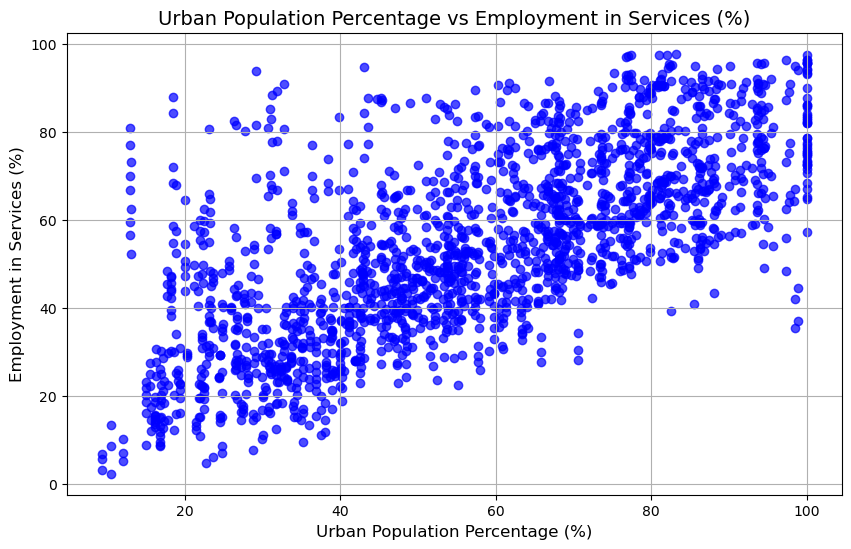

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(
    mergeddata["Valuepopulation"],  
    mergeddata["Valueemployment"],  
    color="blue", alpha=0.7
)
plt.title("Urban Population Percentage vs Employment in Services (%)", fontsize=14)
plt.xlabel("Urban Population Percentage (%)", fontsize=12)
plt.ylabel("Employment in Services (%)", fontsize=12)
plt.grid(True)
plt.show()

This scatter plot shows a clear relation between the percentage of urban population and employment in services. As the urban population grows, more peoplework in the services sector. 
This is especially true in highly urbanized areas, where most jobs are in services, reflecting a shift from agriculture or industry to services in more developed economies. 

### Group regions

In [48]:
continent_mapping = {
    "Total, all countries or areas": "Global",
    "Africa": "Africa",
    "Asia": "Asia",
    "Europe": "Europe",
    "Latin America and the Caribbean": "Latin America",
    "Northern America": "North America",
    "Oceania": "Oceania"
}


In [49]:
mergeddata["Continent"] = mergeddata["Region"].map(continent_mapping)

In [50]:
continentdata = mergeddata[~mergeddata["Continent"].isna()]

In [52]:
continentsum = continentdata.groupby("Continent")[["Valuepopulation", "Valueemployment"]].mean()

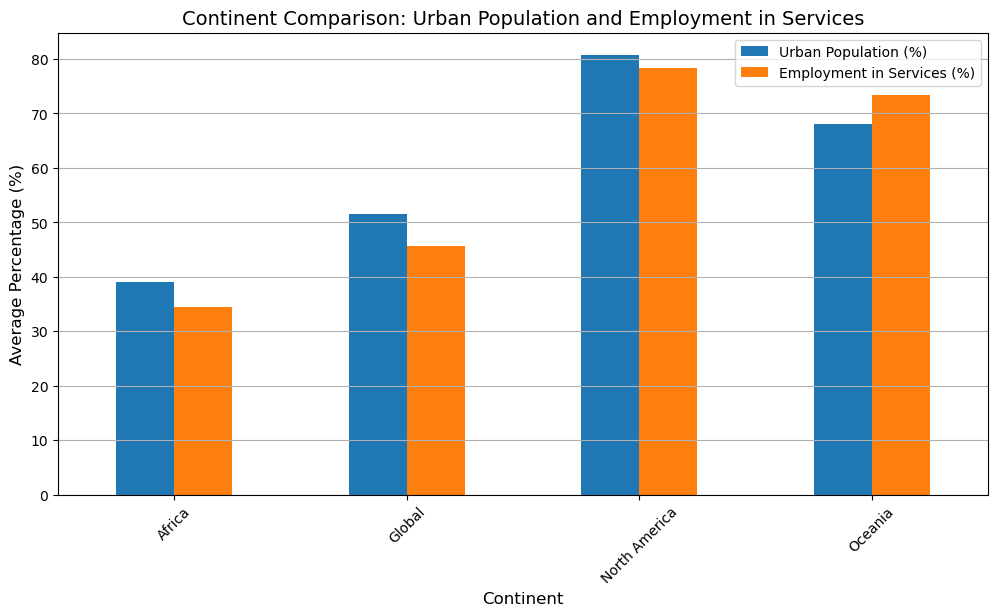

In [53]:
continentsum.plot(kind="bar", figsize=(12, 6))
plt.title("Continent Comparison: Urban Population and Employment in Services", fontsize=14)
plt.xlabel("Continent", fontsize=12)
plt.ylabel("Average Percentage (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(["Urban Population (%)", "Employment in Services (%)"])
plt.grid(axis="y")
plt.show()

The bar chart shows the differences in urban population and employment in services between continents. 
Africa has the lowest levels of urbanization and service jobs, which reflects its rural and agriculture-based economy. 
North America and Oceania have high urban populations and many service jobs, which is common in developed regions. 
The global average helps compare the continents. 